In [ ]:
import cv2
import glob as glob

In [ ]:
import numpy.matlib
import numpy as np
from math import ceil
import math
from math import log10, sqrt
from scipy.signal import convolve2d
filter1=[[0,0.25,0],[0.25,1,0.25],[0,0.25,0]]
filter2=[[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]]

In [ ]:
images=[cv2.imread(img) for img in glob.glob(file path)]

In [ ]:
import numpy as np
for i in range(0,999):
  m,n,p=images[i].shape
  red=[[1,0],[0,0]]
  blue=[[0,0],[0,1]]
  green=[[0,1],[1,0]]
  red=np.matlib.repmat(red,ceil(m/2),ceil(n/2))
  red=red[0:m,0:n]
  green=np.matlib.repmat(green,ceil(m/2),ceil(n/2))
  green=green[0:m,0:n]
  blue=np.matlib.repmat(blue,ceil(m/2),ceil(n/2))
  blue=blue[0:m,0:n]
  red_channel=red*images[i][:,:,0]
  green_channel=green*images[i][:,:,1]
  blue_channel=blue*images[i][:,:,2]
  output=red_channel+green_channel+blue_channel
  filter1=[[0,0.25,0],[0.25,1,0.25],[0,0.25,0]]
  green_filter=convolve2d(green_channel,filter1,mode="same")
  filter2=[[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]]
  red_filter1=convolve2d(red_channel,filter2,mode="same")
  blue_filter1=convolve2d(blue_channel,filter2,mode="same")
  out=np.zeros((m,n,p))
  out[:,:,0]=red_filter1
  out[:,:,1]=green_filter
  out[:,:,2]=blue_filter1
  cv2.imwrite(r"/content/savedimages/"+str(i)+".jpg",out)

In [ ]:
!zip -r /content/file.zip /content/savedimages

	zip warning: name not matched: /content/savedimages

zip error: Nothing to do! (try: zip -r /content/file.zip . -i /content/savedimages)


In [ ]:
from google.colab import files
files.download(r"/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import keras
import tensorflow
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

trdata=ImageDataGenerator()
train_data= trdata.flow_from_directory(file path)
tsdata=ImageDataGenerator()
test_data=tsdata.flow_from_directory(file path)


Found 3000 images belonging to 2 classes.
Found 1018 images belonging to 2 classes.


In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False, input_shape=(224,224,3)) 
model=Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(units=1024,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=2,activation="sigmoid"))
model.build(input_shape = (None, 224, 224, 3))


17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 1026      
Total params: 4,804,290
Trainable params: 4,782,402
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint ("drive/MyDrive/bilinear.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='auto')
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
import numpy as np
hist = model.fit(train_data,validation_data=test_data,epochs=100,verbose=1,batch_size=64)

Epoch 1/2
94/94 [==============================] - 1098s 11s/step - loss: 0.2326 - accuracy: 0.9155 - val_loss: 0.7088 - val_accuracy: 0.8477
Epoch 2/2
94/94 [==============================] - 786s 8s/step - loss: 0.0528 - accuracy: 0.9782 - val_loss: 0.5621 - val_accuracy: 0.8556


In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


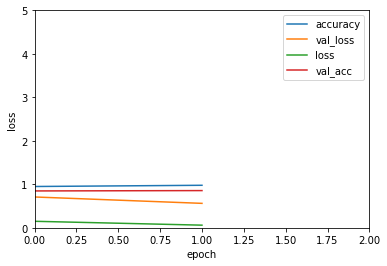

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_loss"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_accuracy"])
plt.axis([0,2,0,5])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["accuracy","val_loss","loss","val_acc"])
plt.show()